# Visual Question Answering by Deep Learning

## Several Resources
- [article](http://iamaaditya.github.io/2016/04/visual_question_answering_demo_notebook) and [jupyter notebook](https://github.com/iamaaditya/VQA_Demo/blob/master/Visual_Question_Answering_Demo_in_python_notebook.ipynb) and [github](https://github.com/iamaaditya/VQA_Demo) from Aaditya Prakash
- [article](https://avisingh599.github.io/deeplearning/visual-qa/) and [github](https://github.com/avisingh599/visual-qa) from Avi Singh

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
from IPython import display

In [2]:
import keras

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce GTX 980M (CNMeM is disabled, cuDNN 5005)


In [3]:
from keras import models, layers, optimizers, metrics
from keras.utils import visualize_util

## Image Model
- VGG16 without the top 2 layers
- See [this notebook](keras-notes/IMAGE%20-%20CIFA%20with%20pretrained%20VGG.ipynb) for how to load pre-trained vgg
- previous versions of keras have problems with poping out layers, see [discussions](https://github.com/fchollet/keras/issues/2371#issuecomment-211734276) here

In [20]:
from keras.models import Sequential, Model
from keras.optimizers import SGD, RMSprop
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D

def build_vgg16(weights_file = None):
    model = Sequential()
    
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))
    
    if weights_file is not None:
        model.load_weights(weights_file)
    
    return model

image_model = build_vgg16("../data/vgg16_keras/vgg16_weights.h5")
print "original # of layers", len(image_model.layers), "output shape", image_model.output_shape
## pop out the last two layers
image_model.layers.pop()
image_model.layers.pop()
print "after removing, # of layers", len(image_model.layers), "output_shape", image_model.output_shape

original # of layers 37 output shape (None, 1000)
after removing, # of layers 35 output_shape (None, 1000)


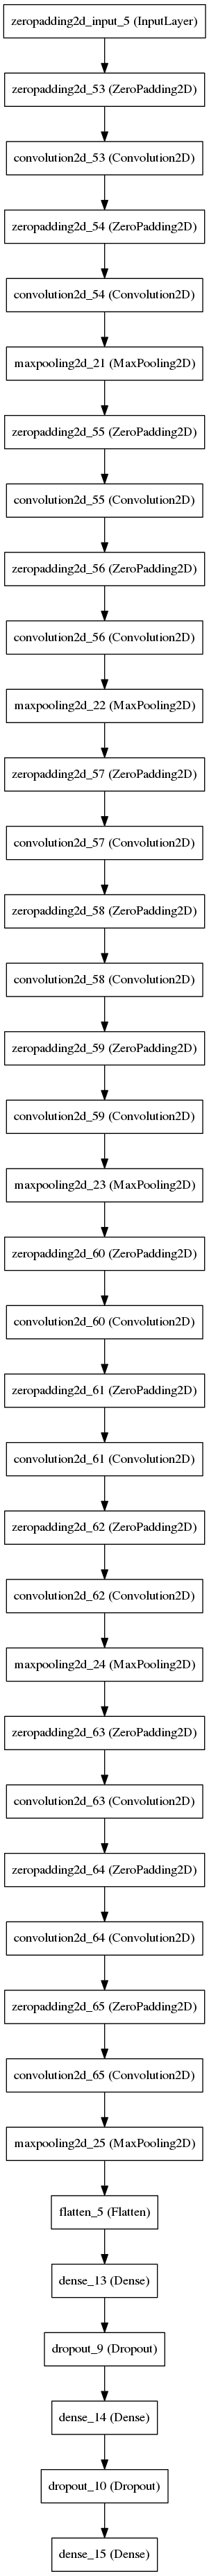

In [23]:
visualize_util.plot(image_model, to_file="../models/vgg16.png")
display.Image(filename = "../models/vgg16.png")

In [24]:
image_model.layers

In [25]:
len(image_model.layers)

35